# **Yapay Zeka ile Gerçekleşecek Olan Siber Olayları Tahmin Etme**

Bu projede, 2005-2020 yılları arasında gerçekleşen gerçek siber olayların belirli bir kısmınının kaydedildiği veri setindeki veriler incelenmiştir. Veriler grafik halinde görselleştirilerek raporlanma sağlanmış, bir sonraki yılda gerçekleşebilecek olan olayların sayısal tahmini yapılmaya çalışılmıştır.

Proje kapsamında python yazılım diliyle birlikte, “kaggle.com” isimli internet sitesi üzerinden temin edilen veri seti kullanılmıştır. Veri işleme ve görselleştirme kısımlarında matlab, pandas, numpy, seaborn, wordcloud kütüphaneleri, veri tahmin aşamasında yapay zekayı desteklemek için sklearn ve csv kütüphaneleri kullanılmıştır. İşlemler, colab online derleyicisi ve local (yerel) bilgisayar üzerinde bulunan PyCharm isimli IDE ile gerçekleştirilmiş ve test edilmiştir. Veri setleri beslenerek gelecek yıllarda Siber Güvenlik alanındaki olaylara yönelik tahmin sisteminin sürekli olarak gerçekleşmesi ve buna yönelik olarak tedbirlerin uygulanması sektörde bulunan tüzel kişiler tarafından beklenmektedir.

## **Veriye ilk bakış**

2005-2020 yılları arasında gerçekleşmiş olan Siber Güvenlik olaylarının bir kısmını içeren veri seti “kaggle.com” isimli internet sitesi üzerinden indirilmiş ve projede kullanılacak olan kütüphaneler tanımlanmıştır. Yapılan işlemler aşağıdaki görselde yer almaktadır.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

import numpy as np

import csv

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

Veri seti pandas kütüphanesi aracılığıyla okunarak, veri setinde bulunan ilk 5 satır kontrol amacıyla listelenmiştir. Aşağıda yapılan işlemlere ait görseller bulunmaktadır.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cyber-operations-incidents.csv')

df.head() # veri setimizdeki ilk 5 satırı listeliyoruz

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
0,Attack on Austrian foreign ministry,2/13/2020,Turla,The suspected Russian hackers conducted a week...,Confirmation https://www.theregister.co.uk/2...,Austrian Foreign Ministry,Russian Federation,Espionage,Government,https://www.theregister.co.uk/2020/02/14/austr...,https://www.bmeia.gv.at/en/the-ministry/press/...,NaN
1,Spear-phishing campaign against unnamed U.S. g...,1/23/2020,Konni Group,The suspected North Korean threat actor Konni ...,NaN,Employees of the U.S. government,Korea (Democratic People's Republic of),Espionage,Government,https://unit42.paloaltonetworks.com/the-fractu...,NaN,NaN
2,Australian Signals Directorate,4/6/2020,NaN,Responsible for attacking infrastructure that ...,NaN,NaN,Australia,Data destruction,Private sector,https://www.minister.defence.gov.au/minister/l...,https://www.zdnet.com/article/australia-on-the...,NaN
3,Catfishing of Israeli soldiers,2/16/2020,APT-C-23,The Hamas-associated threat actor APT-C-23 tar...,Hack Back https://www.bleepingcomputer.com/n...,Israeli Defense Forces (IDF) soldiers,"Palestine, State of",Espionage,Military,https://www.bleepingcomputer.com/news/security...,https://research.checkpoint.com/2020/hamas-and...,NaN
4,Targeting of U.S. companies and government age...,8/10/2020,Fox Kitten,Iranian hackers attacked high-end networking e...,NaN,"U.S. government agencies, U.S. companies",Iran (Islamic Republic of),Espionage,"Government, Private sector",https://www.cybersafe.news/fbi-warns-about-ira...,https://www.zdnet.com/article/fbi-says-an-iran...,NaN


Veri setindeki sütunların kontrolünü sağlamak için `df.info()` komutu kullanılmıştır.


In [ ]:
df.info() # veri setimizdeki sütunların kontrolünü sağlıyoruz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         481 non-null    object
 1   Date          474 non-null    object
 2   Affiliations  347 non-null    object
 3   Description   481 non-null    object
 4   Response      86 non-null     object
 5   Victims       453 non-null    object
 6   Sponsor       439 non-null    object
 7   Type          447 non-null    object
 8   Category      458 non-null    object
 9   Sources_1     475 non-null    object
 10  Sources_2     355 non-null    object
 11  Sources_3     168 non-null    object
dtypes: object(12)
memory usage: 45.2+ KB


Veri setinde boş değerlerin olup olmadığı hakkında bilgi sağlayabilmek için `df.isnull().values.any()` komutu kullanılmıştır. Boş değerler bulunan veri sayısına ulaşmak için ise `df.isnull().sum()` komutu kullanılmıştır.

In [ ]:
df.isnull().values.any() # verilerde boşluk var mı ?


True

In [ ]:
df.isnull().sum() # hangi sütunlarda ne kadar boşluk var

Title             0
Date              7
Affiliations    134
Description       0
Response        395
Victims          28
Sponsor          42
Type             34
Category         23
Sources_1         6
Sources_2       126
Sources_3       313
dtype: int64

### **WordCloud**

Bu aşamada, WordCloud yapısı kullanılarak sahip olunan tüm veriler arasında en çok bulunan kelimeler görüntülenmiş, Verilerin içeriği hakkında genel bir bilginin tablo olarak sunulması amaçlanmıştır.

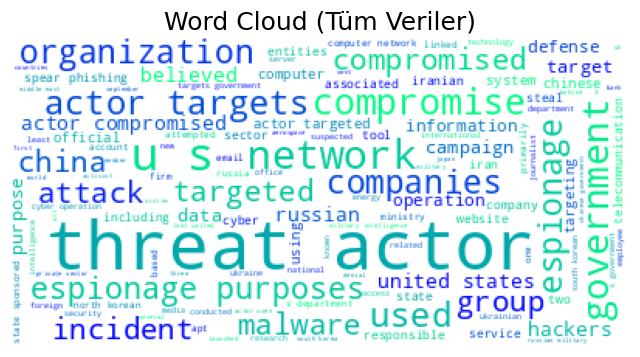

In [ ]:
word_string = " ".join(df["Description"].str.lower()) # description sütunundaki verileri küçük karakter formatında birleştiriyoruz
wordcloud = WordCloud(stopwords=STOPWORDS, colormap='winter', background_color="white").generate(word_string) # wordcloud oluşturma kodu

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud (Tüm Veriler)', fontsize=18, c='black')
plt.show()

## **Mevcut Verilere Yönelik İstatistikler**

Bu aşamada veriler görselleştirilerek, genelden özele doğru bir inceleme yapılmıştır. Bilgilerin görselleştirilme kısmında pasta grafiği (pie), sütun grafiği (barh ve bar plot), çizgi grafiği (line plot), saçılım grafiği (scatter plot) kullanılmıştır.

Aşağıdaki 2005-2020 tarihleri arasında gerçekleşen siber saldırıların türlerine ait pasta grafiği yer almaktadır.

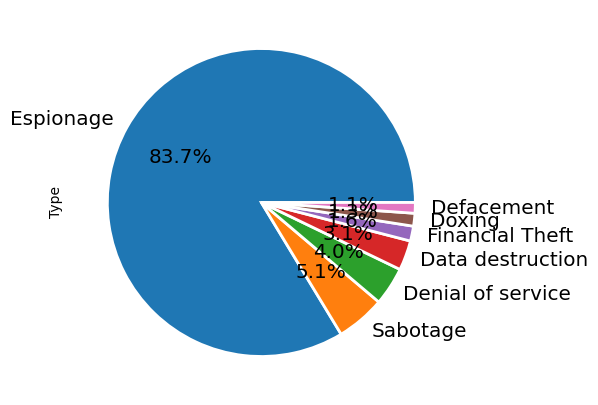

In [ ]:
# Pasta grafiği
ax = df['Type'].value_counts().plot.pie(figsize=(6, 5), autopct='%1.1f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'}, textprops={'size': 'x-large'})

Veriler hakkında bilgi:

```
Espionage           = Casusluk      (Gizli bilgileri bulma veya bir işlemi takip etme)
Sabotage            = Sabotaj       (Korku veya caydırma amacı içeren saldırılar)
Denial of Service   = Servis Reddi  (Sunucu Çökertme)
Data Destruction    = Veri İmhası
Financial Theft     = Finansal Hırsızlık
Doxing              = Gizli Bilgileri Bulup Yayma
Defacement          = Arayüz Görünümünü Değiştirme Saldırıları
```

2005-2020 yılları arasında gerçekleşen saldırıların türlere göre sayısı aşağıda bulunan kod bloğunda sütun grafiği haline getirilmiştir.

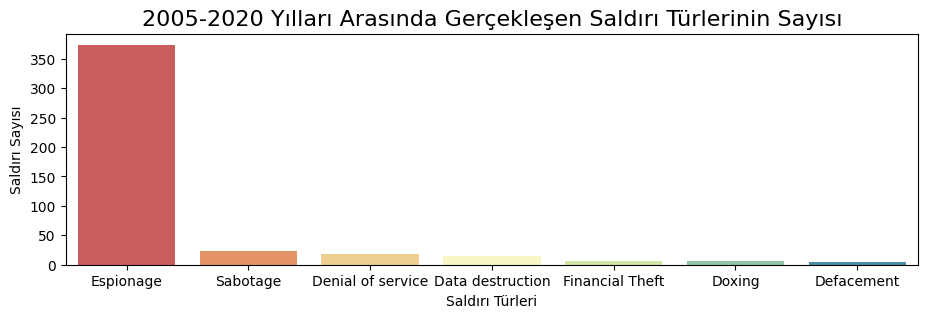

In [ ]:
# saldırı türlerini değişkene alıyoruz
saldiri_turleri = df['Type'].value_counts().index

# plot grafik oluşturuyoruz
fig, ax = plt.subplots(1, 1, figsize=(11, 3))
# veriyi tabloya yerleştirerek renk ayarlaması yapıyoruz
sns.countplot(data=df, x='Type', order=saldiri_turleri, palette='Spectral')

# alt kısım için yazı
ax.set(xlabel='Saldırı Türleri')
# sol kısım için yazı
ax.set(ylabel='Saldırı Sayısı')

# grafik başlığı
plt.title('2005-2020 Yılları Arasında Gerçekleşen Saldırı Türlerinin Sayısı', fontsize=16, c='black')
plt.show()


## **Veri Filtreleme**

Bu aşamada veriler tarih, ülke ismi gibi spesifik kriterlere göre incelenerek görselleştirilmiştir.

Aşağıda kullanıcının istediği yıla yönelik sistemde araştırma yapabilmesine olanak sağlayan basit bir arayüz tasarlanmıştır.

In [ ]:
while True:
    girilen_yil = input("2005-2020 arasında bir tarih giriniz: ")
    try:
        girilen_yil = int(girilen_yil)
    except Exception as e:
        print(f"Hata!\n{e.args}")
        continue
    if 2005 <= girilen_yil <= 2020:
        girilen_yil = str(girilen_yil)
        break
    else:
        print("Geçersiz tarih girdiniz")

baslangic_tarihi = girilen_yil+'-01-01'
bitis_tarihi = girilen_yil+'-12-31'

2005-2020 arasında bir tarih giriniz: 2020


Date sütununda yer alan tarih verilerinin pandas kütüphanesi tarafından "tarih" olarak görülebilmesi ve bazı özel fonksiyonların kullanılabilmesi için pandas kütüphanesinde tanımlı "datetime" objesine dönüştürülmesi gerekmektedir.

Aşağıda bulunan kod bloklarında Date sütununda yer alan veriler pandas kütüphanesinde bulunan "datetime" objesine çevrilmiş ve Date kısmı boş olan satırlar veri setinden silinmiştir

In [ ]:
# pandas datetime objesine çeviriyoruz (sort fonksiyonu vs. çalışması için)
df["Date"] = pd.to_datetime(df["Date"])
# Date kısmı boş olan satırların silinmesini sağlıyoruz
df_yillar = df[pd.notnull(df['Date'])]

Aşağıdaki kod bloğunda kullanıcının seçmiş olduğu yıl ile ilgili veri setinde filtreleme işlemi yapılmıştır.

In [ ]:
# başlangıç ve bitiş tarihi aralığındaki tarihleri alıyorum
yil_verileri = (df_yillar['Date'] > baslangic_tarihi) & (df_yillar['Date'] <= bitis_tarihi)
# string değer olduğu için loc kullanıldı | yil_verileri sorgusuna göre verileri getir
yil_verileri = df_yillar.loc[yil_verileri]
yil_verileri = yil_verileri.reset_index(drop=True)
# siber olaylarla ilgili kaynaklara ihtiyaç duymadığımız için bu verileri siliyoruz
yil_verileri = yil_verileri.drop(['Sources_1', 'Sources_2', 'Sources_3'], axis=1)

Veri setinde, kullanıcın seçmiş olduğu yıl ile eşleşen verilerin içeriği hakkında genel bilgi sahibi olmak üzere WordCloud yapısı uygulanmıştır.

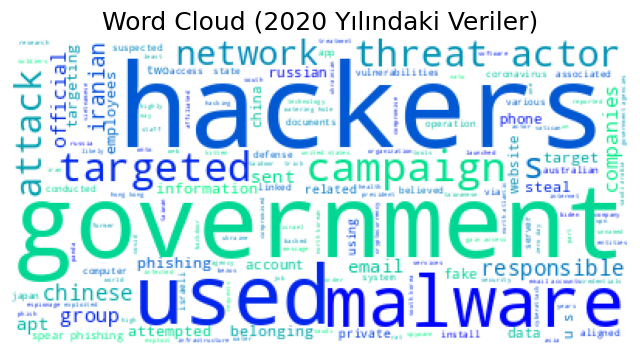

In [ ]:
word_string = " ".join(yil_verileri['Description'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS, colormap='winter', background_color="white").generate(word_string)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.clf()
plt.imshow(wordcloud)

plt.axis('off')
plt.title(f'Word Cloud ({girilen_yil} Yılındaki Veriler)', fontsize=18, c='black')
plt.show()

Kullanıcının seçmiş olduğu yıl ile ilgili tehdit aktörlerinin aktiviteleri incelenerek veriler sütun grafiğine yansıtılmıştır.

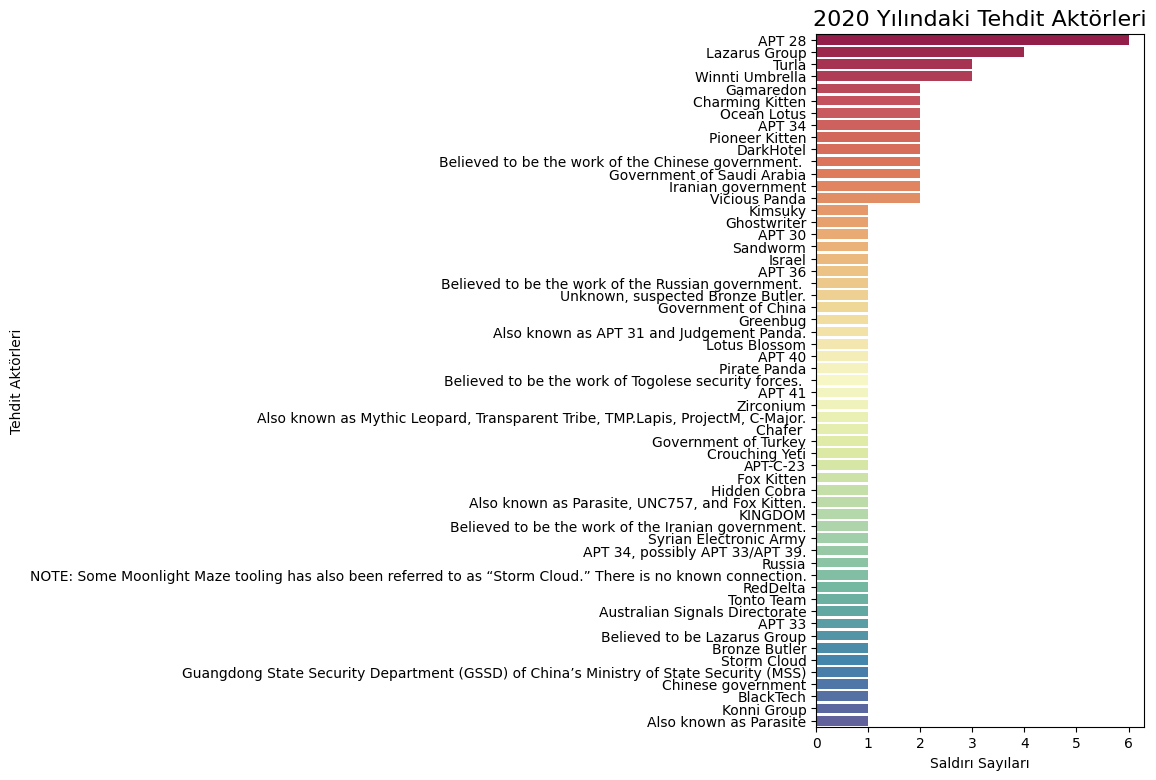

In [ ]:
siber_olaylar_yil = yil_verileri["Affiliations"].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(8, 9))
sns.countplot(data=yil_verileri, y='Affiliations', order=yil_verileri["Affiliations"].value_counts().index, palette="Spectral")

ax.set(xlabel='Saldırı Sayıları')
ax.set(ylabel='Tehdit Aktörleri')
plt.title(f'{girilen_yil} Yılındaki Tehdit Aktörleri', fontsize=16, c='black')
plt.subplots_adjust(left=0.56, right=0.97)
plt.show()

Kullanıcının seçtiği tarihte tehdit aktörerlerine en çok sponsor olan ülkelerin listelenmesine yönelik işlemler yapılmıştır. 

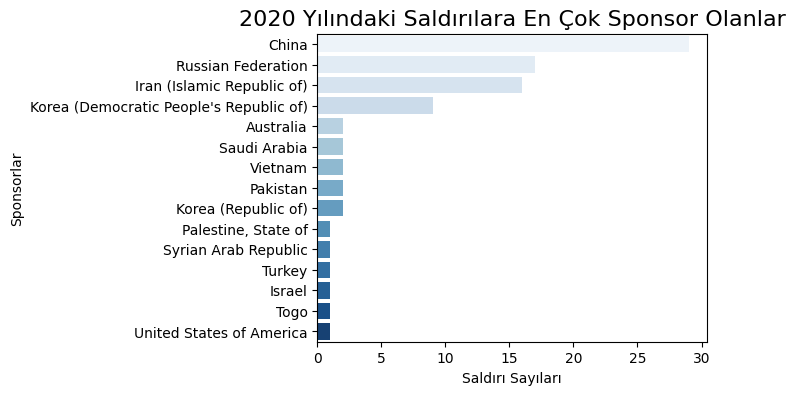

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.countplot(data=yil_verileri, y='Sponsor', order=yil_verileri["Sponsor"].value_counts().index, palette='Blues') # (alternatif: palette='mako')

ax.set(xlabel='Saldırı Sayıları') # alt kısım için yazı
ax.set(ylabel='Sponsorlar') # sol kısım için yazı

plt.title(f'{girilen_yil} Yılındaki Saldırılara En Çok Sponsor Olanlar', fontsize=16, c='black')
plt.subplots_adjust(left=0.25)
plt.show()


Kullanıcının seçmiş olduğu ülkeye göre, hükümetin maruz kaldığı siber saldırı sayısı yılla bağlı olarak listelenmiştir.

Lütfen ülkenin tam ismini giriniz: Turkey
Lütfen ülkenin kısaltmasını giriniz: TR


<Axes: title={'center': 'Yıllara Göre Maruz Kalınan Siber Saldırı Sayısı (Turkey)'}, xlabel='Date'>

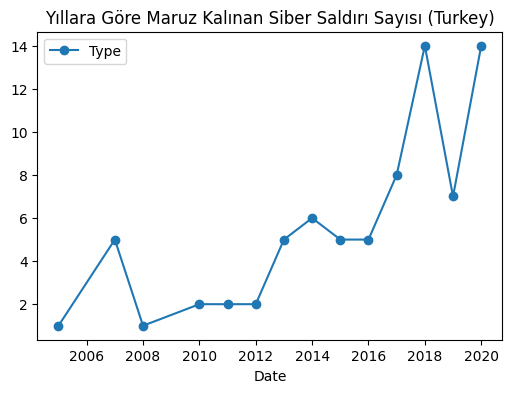

In [ ]:
secilen_ulke = input("Lütfen ülkenin tam ismini giriniz: ")
ulke_kisaltmasi = input("Lütfen ülkenin kısaltmasını giriniz: ")

ulkedeki_veriler = df[df["Victims"].astype(str).str.contains('|'.join([secilen_ulke, ulke_kisaltmasi]), case=False)]
yila_gore_hacklenme = ulkedeki_veriler.groupby([df["Date"].dt.year]).agg({'Type': 'count'})

yila_gore_hacklenme.plot(style="-o", figsize=(6, 4), title=f"Yıllara Göre Maruz Kalınan Siber Saldırı Sayısı ({secilen_ulke})")

## **Gelecek Yıla Yönelik Veri Tahmini**

Bu aşamada veri tahminini gerçekleştirmek üzere yapay zekanın performansı artırmak istenmiş, buna bağlı olarak regresyon işlemleri uygulanmıştır.

**Regresyon:** Regresyon denklemi birden fazla değişken arasındaki ilişkiyi analiz etmeye ve buna bağlı olarak yeni tahminler üretilebilmesine olanak sağlar.


2020 yılındaki "Defacement" (arayüz görünümünü değiştirme) saldırısına yönelik verileri hesaplamak için kalan saldırı türleri bağımsız değişken olarak kabul edilir ve bu veriler kullanılarak bir regresyon denklemi oluşturulur. Bu sayede "Defacement" sayısı 2020 yılı için tahmin edilir. Ardından 2020 yılındaki gerçek değer ile arasındaki fark incelenir ve MSE, RMSE değerleri bulunur. Bu işlem bağımsız değişkenlere olduğu sürece her yılda tahmin yapmak için kullanılabilir.

```
MSE = ortalama hatanın karesi
RMSE = ortalama karekök sapması
```


2020 yılındaki verilerin tahmin edilip karşılaştırılması ve 2021 yılındaki verilerin tahmin edilmesi aşamasında multiple linear regression (çoklu doğrusal regresyon) yöntemi kullanılmıştır. Tahmin ediciler ve yanıt arasında doğrusal bir ilişki olduğu ve basit yorumlanabilir bir model olduğu için bu regresyonda çoklu doğrusal yöntem tercih edilmiştir.

Gelecek yıl "Defacement" arayüz saldırısının ne kadar olacağını tahmin edebilmek için kullanacağımız regresyon denkleminde ihtiyaç duyduğumuz şey; hangi yıl hangi saldırıların ne kadar olduğudur. Bu yüzden aşağıdaki kod bloğunda sahip olunan verilerle yeni bir CSV dosyası yaratılmıştır.

In [ ]:
fields = list(df['Type'].value_counts().index)
fields.insert(0, "Year")
rows = []

for year in range(2005, 2021):
    baslangic_tarihi = f'{year}-01-01'
    bitis_tarihi = f'{year}-12-31'

    # başlangıç ve bitiş tarihi aralığındaki tarihleri alıyorum
    yil_verileri = (df_yillar['Date'] > baslangic_tarihi) & (df_yillar['Date'] <= bitis_tarihi)
    # string değer olduğu için loc kullanıldı | yil_verileri sorgusuna göre verileri getir
    yil_verileri = df_yillar.loc[yil_verileri]

    year_fields = list(yil_verileri["Type"].value_counts().index)
    year_rows = list(yil_verileri["Type"].value_counts().reset_index(name="count")["count"])
    year_output = list(zip(year_fields, year_rows))

    result = [0]*len(fields) # [0, 0, 0, 0, 0, 0, 0]
    result[0] = year # [2007, 0, 0, 0, 0, 0, 0]
    
    for i,f in enumerate(fields):
        for yf in year_output:
            if f == yf[0]:
                result[i] = yf[1]

    rows.append(result)

# CSV dosyamızın görüntüsü
print(fields)
for e in rows:
  print(e)

# dosya yazma işlemi
with open('predictdata.csv', 'w') as f:
    write = csv.writer(f)
    write.writerow(fields)
    write.writerows(rows)



['Year', 'Espionage', 'Sabotage', 'Denial of service', 'Data destruction', 'Financial Theft', 'Doxing', 'Defacement']
[2005, 1, 0, 0, 0, 0, 0, 0]
[2006, 3, 0, 0, 0, 0, 0, 0]
[2007, 7, 0, 3, 0, 0, 0, 0]
[2008, 6, 0, 1, 0, 0, 0, 0]
[2009, 3, 0, 1, 0, 0, 0, 0]
[2010, 6, 1, 1, 0, 0, 0, 1]
[2011, 12, 0, 2, 0, 0, 0, 0]
[2012, 7, 0, 3, 2, 0, 0, 0]
[2013, 17, 0, 1, 0, 0, 0, 0]
[2014, 31, 1, 0, 1, 0, 1, 0]
[2015, 30, 1, 1, 0, 0, 0, 1]
[2016, 26, 2, 1, 3, 1, 0, 0]
[2017, 36, 2, 2, 2, 2, 0, 1]
[2018, 64, 5, 0, 0, 1, 5, 0]
[2019, 56, 4, 2, 4, 0, 0, 0]
[2020, 64, 6, 0, 2, 3, 0, 2]


Oluşturulan CSV uzantılı dosyanda işlemlerin gerçekleştirilebilmesi için pandas kütüphanesiyle okuma işlemi sağlanmıştır. Ek olarak makine öğrenmesi modelimizi eğitme aşamasında kullanacağımız X_train, y_train, X_test ve y_test isimli değişkenler tanımlanmıştır. X_train 2005-2019 yılları arasındaki defacement hariç saldırı türlerinin değerlerini, y_train 2005-2019 yılları arasındaki defacement saldırı türünün değerlerini içermektedir. Bu değişkenler modelimizi eğitmek için kullanılacaktır. X_test 2020 yılındaki defacement hariç saldırı türlerinin değerlerini, y_test ise 2020 yılındaki defacement saldırı değerini içermektedir.

Kullanılacak olan regresyon yönteminin doğruluk payını ölçebilmek adına, modelin önce var olan veriler üzerinde kullanılması amaçlanmaktadır. Model 2005-2019 yılları arasındaki veriler ile eğitildikten sonra, 2020 yılındaki defacement saldırı verisini tahmin etmesi beklenecektir.


In [ ]:
predictdata = pd.read_csv('predictdata.csv')
X_train = predictdata.iloc[:15, 1:7] # 2005-2019 arası diğer saldırı türleri
y_train = predictdata.iloc[:15, 7] # 2005-2019 arası "defacement" saldırı değerleri
X_test = predictdata.iloc[15:16, 1:7] # 2020 yılındaki diğer saldırı türleri
y_test = predictdata.iloc[15:16, 7] # 2020 yılındaki "defacement" saldırı değeri

(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((15, 6), (15,), (1, 6), (1,))

#### **MULTIPLE LINEAR REGRESSION (Çoklu Doğrusal Regresyon)**

Aşağıdaki görselde regresyon işlemi kullanılmak üzere class(sınıf) tanımlaması yapılmış ve fit() fonksiyonu 2005-2019 arasındaki veriler ile modelimizi eğitmek amacıyla kullanılmıştır. Ardından X_test verisi verilerek defacement verilerini tahmin etmesi beklenmiştir. Gerçek değerler (y_test) ile tahmin edilen değerler (y_predict_linear) arasındaki MSE ve RMSE değerleri incelenerek ekrana yazdırılmıştır. 0.1 ve 0.4 değerleriyle modelin gerçeğe yakın tahminler üreterek, doğruluk payının yüksek olduğu kanıtlanmıştır.

Doğruluk oranı hesaplama yöntemi:
	( 1.96 x RMSE ) x 100

In [ ]:
reg = LinearRegression()

reg.fit(X_train, y_train) # 2005-2019 arasındaki tüm veriler

# 2020 yılındaki diğer saldırı türlerini vererek, 2020 yılındaki defacement saldırısını tahmin etmesini istiyoruz
y_pred_linear = reg.predict(X_test)


# tahmin edilen değer ile gerçek değer arasındaki hata payını buluyoruz
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)


# MSE = ortalama hata karesi
# RMSE = ortalama hatanın karekökü

print(f"MSE: {mse_linear}\nRMSE: {rmse_linear}\nAccuracy: {(1.96*rmse_linear)*100}")

MSE: 0.19513216218378301
RMSE: 0.4417376621749418
Accuracy: 86.58058178628859


Aynı yöntemler modelin 2021 tahmini oluşturmasını sağlamak için kullanılmıştır. Aşağıdaki görselde yapılan işlemler yer almaktadır.

In [ ]:
types = list(df['Type'].value_counts().index) # saldırı türleri

data_2021 = [0]*len(types) # [0, 0, 0, 0, 0, 0, 0]
data_2021[0] = "2021"

for i, type in enumerate(types):
    #sadece 1 satır için tahmin işlemi yapacağız, bu yüzden reshape kullanıyoruz
    X = predictdata["Year"].values.reshape(-1, 1)
    #saldırı türünün değerlerini kullanarak bir sonraki değerini tahmin etmeye çalışacağız 
    y = predictdata[str(type)].values

    model = LinearRegression()
    model.fit(X, y)

    #tahmin işlemi için predict fonksiyonunun kullanarak 2021 yılındaki veriyi tahmin etmeye çalışıyoruz
    prediction_2021 = model.predict([[2021]])
    #çıkan sonucu saldırı türünün id'sine göre listeye ekliyoruz
    data_2021[i] = prediction_2021[0]

data_2021

[59.04999999999927,
 4.274999999999977,
 1.0500000000000007,
 2.400000000000034,
 1.4499999999999886,
 1.0999999999999943,
 0.7999999999999972]

In [ ]:
data2 = {"Types": types,
         "2021": data_2021}

df3 = pd.DataFrame(data2)

print(df3)

               Types    2021
0          Espionage  59.050
1           Sabotage   4.275
2  Denial of service   1.050
3   Data destruction   2.400
4    Financial Theft   1.450
5             Doxing   1.100
6         Defacement   0.800


Aşağıdaki grafikte 2005-2020 yılları arasında gerçekleşmiş saldırıların türlere göre sayıları gösterilmiştir.

<Axes: xlabel='Year'>

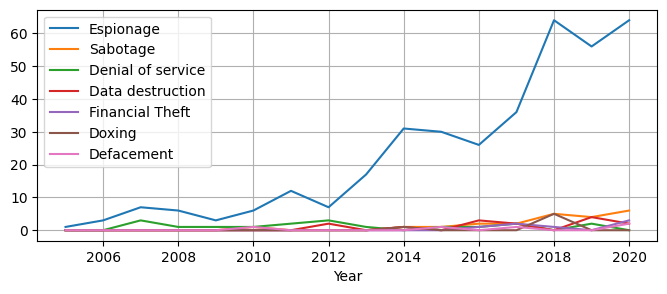

In [ ]:
predictdata.set_index("Year").plot(grid=True, figsize=(8, 3))

Aşağıdaki bulunan grafikte ise Makine Öğrenmesi ile geliştirilen Yapay Zeka modeli tarafından tahmin edilmiş olan 2021 yılı verilerine ait siber olayların sayısı türlerine göre belirtilmiştir.

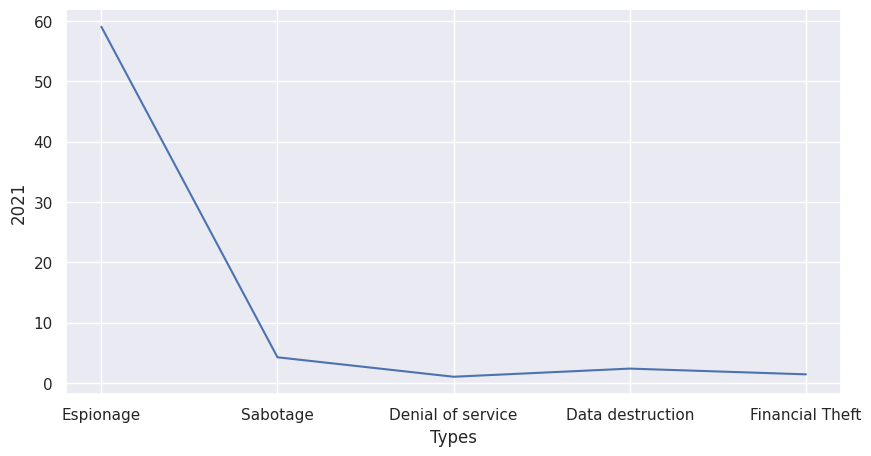

In [ ]:
sns.lineplot(x=df3.head()["Types"], y=df3.head()["2021"], sizes=(5, 3))
sns.set(rc={'figure.figsize': (10, 5)})

## **Sonuç ve Öneriler**

Proje kapsamında Siber Güvenlik alanında gerçekleşen olayların belirli bir kısmı kullanılarak Makine Öğrenmesi ile Yapay Zeka modeli geliştirilmiştir. Geliştirilen yapay zeka modelinin gelecek yıldaki verilerin nasıl olacağına dair tahmin yapması sağlanmıştır. Yapay Zeka modeli yapılan testlere göre %86.5 doğruluk oranı vermektedir.

Projedeki veri setlerinin incelenmesi sonucu yapay zeka modelinin yaptığı tahminlere göre göre; 2021 yılı espionage (casusluk) türündeki siber saldırıların sayısı 59, sabotage (sabotaj) türündeki siber saldırıların sayısı 4, denial of service (sistem reddi) türündeki saldırıların sayısı 1, data destruction (veri imhası) türündeki saldırıların sayısı 2, financial theft (hırsızlık) türündeki saldırıların sayısı 1, doxing (gizli bilgileri yayma) türündeki saldırıların sayısı 1, defacement (arayüz görünümü değiştirme) türündeki saldırıların sayısı 0 olacaktır.

Siber Güvenlik sektöründe aktif olarak rol alan tüzel ve gerçek kişilerin işbu projede kullanılan veri setini gerçek bilgilerle besleyerek gelecek yıllara yönelik gerçek veri tahminleri yapılmasını sağlamaları beklenmektedir.